In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets

In [2]:
results_path = '../Metrics/results/'

In [3]:
csv_paths = sorted(glob(results_path + '*'))

In [4]:
def get_method(name):
    s = name
    s = s.split('/')[1]
    s = s.split('-', 1)[1]

    if s.startswith('tsne'):
        return s[:7]
    elif s.startswith('dtsne'):
        return 'dtsne'
    elif s.startswith('pca'):
        return s[:6]
    else:
        return s.split('_')[0]

In [5]:
df_metrics = pd.DataFrame()
for p in csv_paths:
    df = pd.read_csv(p)
    df = df.drop(['spat_kl', 'stab_kl'], axis=1)  # Bad metric
    # Extract dataset and method into own column
    df.columns = np.concatenate([['name'], df.columns.values[1:]])
    df['dataset'] = df['name'].str.split('_', 1).str[0].str.extract(r'.*/(.*)-.*')
    df['method'] = df['name'].apply(get_method)
    df = df.set_index('name')
    
    # Average nh and np metrics 
    cols = [c for c in df.columns if 'spat_nh_' in c]
    df['spat_nh_mean'] = np.mean(df[cols], axis=1)
    
    cols = [c for c in df.columns if 'spat_np_' in c]
    df['spat_np_mean'] = np.mean(df[cols], axis=1)
    
    cols = [c for c in df.columns if 'spat_trust_' in c]
    df['spat_trust_mean'] = np.mean(df[cols], axis=1)
    
    cols = [c for c in df.columns if 'spat_cont_' in c]
    df['spat_cont_mean'] = np.mean(df[cols], axis=1)
    
    df_metrics = pd.concat([df_metrics, df])

In [6]:
methods = ['AE', 'VAE', 'tsne_s1', 'tsne_s4', 'dtsne', 'pca_s1', 'pca_s4']
metrics = ['spat_pearson', 'spat_spearman' , 'spat_kendall', 'spat_stress_s', 'spat_nh_mean', 'spat_np_mean', 'spat_trust_mean', 'spat_cont_mean', 'stab_pearson', 'stab_spearman' , 'stab_kendall', 'stab_stress_s']
invert_colormap = ['stab_stress_n', 'stab_stress_s', 'spat_stress_n', 'spat_stress_s']

In [7]:
meta = df_metrics[['dataset', 'method']]
df_metrics = df_metrics[metrics]

In [8]:
df_metrics = (df_metrics - df_metrics.min()) / (df_metrics.max() - df_metrics.min())
df_metrics['spat_stress_s'] = 1 - df_metrics['spat_stress_s']
df_metrics['stab_stress_s'] = 1 - df_metrics['stab_stress_s']

In [9]:
df_metrics = pd.merge(meta, df_metrics, left_index=True, right_index=True)
df_all_runs = df_metrics
df_metrics = df_metrics[df_metrics['method'].isin(methods)]

In [10]:
df_metrics.head()

,dataset,method,spat_pearson,spat_spearman,spat_kendall,spat_stress_s,spat_nh_mean,spat_np_mean,spat_trust_mean,spat_cont_mean,stab_pearson,stab_spearman,stab_kendall,stab_stress_s
name,,,,,,,,,,,,,,
Output/cartolastd-AE_10f_10f_2f_50ep.csv,cartolastd,AE,0.905405,0.945078,0.860250,0.905405,0.248482,0.582414,0.882691,0.798291,0.858736,0.998245,0.990671,0.858736
Output/cartolastd-VAE_10f_10f_2f_100ep.csv,cartolastd,VAE,0.917139,0.958556,0.885360,0.917139,0.377160,0.757404,0.919837,0.910607,0.922775,1.000000,0.998270,0.922775
Output/cartolastd-tsne_s1_30p.csv,cartolastd,tsne_s1,0.771678,0.807043,0.659359,0.771678,0.422683,0.717946,0.912679,0.863318,0.438419,0.342575,0.222222,0.438419
Output/cartolastd-tsne_s4_30p.csv,cartolastd,tsne_s4,0.705089,0.739331,0.586092,0.705089,0.314260,0.505816,0.703485,0.624727,0.711466,0.856664,0.762515,0.711466
Output/cartolastd-dtsne_100p_0-1l.csv,cartolastd,dtsne,0.783530,0.829540,0.684607,0.783530,0.341416,0.664809,0.881975,0.846269,0.486706,0.266308,0.150999,0.486706


## Dataset trait correlation table

In [11]:
dataset_traits = {'cartolastd' : [696,19,17,5,0.647,0],
                    'cifar10cnn' : [1000,30,10,10,0.6599,0],
                    'esc50' : [320,108,128,8,0.0345,0],
                    'fashion' : [1000,10,784,10,0.4762,0.2971],
                    'gaussians' : [2000,10,100,10,0.368,0],
                    'nnset' : [80,30,8070,8,0.0057,0.0001],
                    'qtables' : [180,40,1200,9,0.0077,0.0007],
                    'quickdraw' : [600,89,784,6,0.4309,0.9013],
                    'sorts' : [80,100,100,8,0.3505,0.01],
                    'walk' : [300,50,100,3,0.4783,0.0001]}

dataset_traits = pd.DataFrame.from_dict(dataset_traits, orient='index', columns=['items', 'timesteps', 'dims', 'classes', 'intrinsic_dim', 'sparsity_ratio'])
dataset_traits

,items,timesteps,dims,classes,intrinsic_dim,sparsity_ratio
fashion,1000,10,784,10,0.4762,0.2971
cifar10cnn,1000,30,10,10,0.6599,0.0000
walk,300,50,100,3,0.4783,0.0001
gaussians,2000,10,100,10,0.3680,0.0000
nnset,80,30,8070,8,0.0057,0.0001
quickdraw,600,89,784,6,0.4309,0.9013
sorts,80,100,100,8,0.3505,0.0100
esc50,320,108,128,8,0.0345,0.0000
cartolastd,696,19,17,5,0.6470,0.0000
qtables,180,40,1200,9,0.0077,0.0007


In [12]:
spat_dist_cols = ['spat_pearson', 'spat_spearman' , 'spat_kendall', 'spat_stress_s']
spat_neigh_cols = ['spat_nh_mean', 'spat_np_mean', 'spat_trust_mean', 'spat_cont_mean']
stab_cols = ['stab_pearson', 'stab_spearman' , 'stab_kendall', 'stab_stress_s']

In [13]:
df = pd.DataFrame(np.array([df_metrics[spat_dist_cols].mean(axis=1),
                            df_metrics[spat_neigh_cols].mean(axis=1),
                            df_metrics[stab_cols].mean(axis=1)]).T,
                            index=df_metrics['dataset'], columns=['spat_dist_cols', 'spat_neigh_cols', 'stab_cols'])

In [14]:
for t in dataset_traits.columns:
    df[t] = [dataset_traits.loc[d][t] for d in df.index]

In [15]:
corr_table = df.corr()
corr_table = corr_table.iloc[:3,3:]

In [16]:
corr_table

,items,timesteps,dims,classes,intrinsic_dim,sparsity_ratio
spat_dist_cols,-0.459067,0.154909,-0.091957,-0.336073,-0.023358,-0.242243
spat_neigh_cols,0.167766,-0.325039,-0.074040,0.209008,-0.053913,-0.580553
stab_cols,0.167552,0.014265,-0.014605,0.292790,-0.099568,0.145478


In [17]:
# see https://docs.google.com/spreadsheets/d/1MmP4H2ddPpWyHWsmsgLh_6Pl9UbYPiocpoqksISKcDI/edit#gid=0
# edited and with colors

In [18]:
# Sanity check

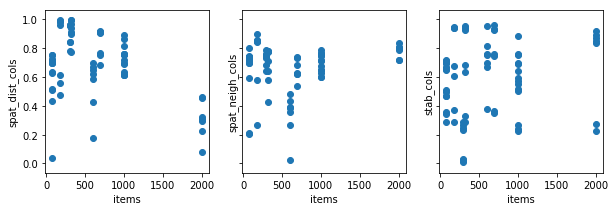

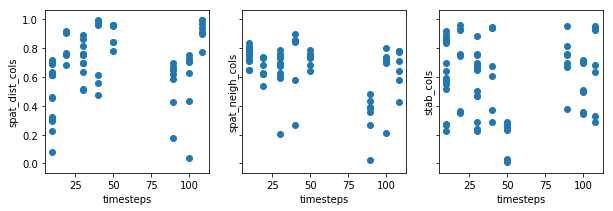

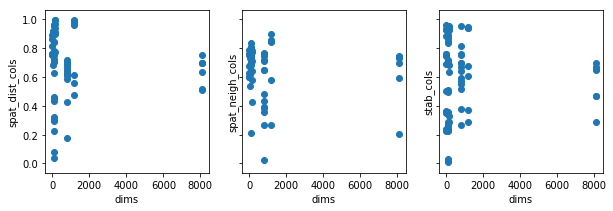

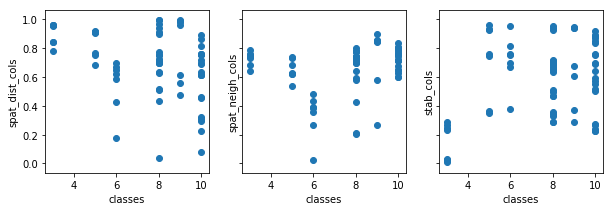

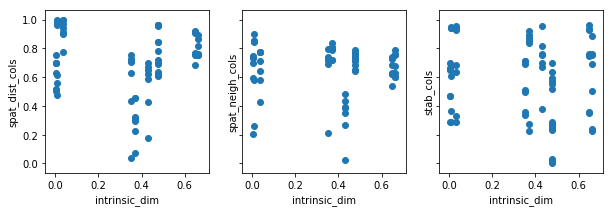

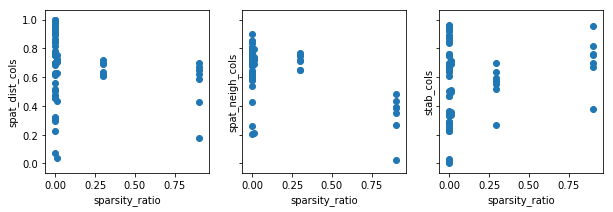

In [19]:
for t in ['items', 'timesteps', 'dims', 'classes', 'intrinsic_dim', 'sparsity_ratio']:
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10,3), sharey=True)
    for i, m in enumerate(['spat_dist_cols', 'spat_neigh_cols', 'stab_cols']):
        axs[i].scatter(df[t], df[m])
        axs[i].set_xlabel(t)
        axs[i].set_ylabel(m)

## t-SNE plots of the metric results

In [20]:
df_metrics = df_all_runs  # get back conv methods

In [21]:
df_metrics.head()

,dataset,method,spat_pearson,spat_spearman,spat_kendall,spat_stress_s,spat_nh_mean,spat_np_mean,spat_trust_mean,spat_cont_mean,stab_pearson,stab_spearman,stab_kendall,stab_stress_s
name,,,,,,,,,,,,,,
Output/cartolastd-AE_10f_10f_2f_50ep.csv,cartolastd,AE,0.905405,0.945078,0.860250,0.905405,0.248482,0.582414,0.882691,0.798291,0.858736,0.998245,0.990671,0.858736
Output/cartolastd-VAE_10f_10f_2f_100ep.csv,cartolastd,VAE,0.917139,0.958556,0.885360,0.917139,0.377160,0.757404,0.919837,0.910607,0.922775,1.000000,0.998270,0.922775
Output/cartolastd-tsne_s1_30p.csv,cartolastd,tsne_s1,0.771678,0.807043,0.659359,0.771678,0.422683,0.717946,0.912679,0.863318,0.438419,0.342575,0.222222,0.438419
Output/cartolastd-tsne_s4_30p.csv,cartolastd,tsne_s4,0.705089,0.739331,0.586092,0.705089,0.314260,0.505816,0.703485,0.624727,0.711466,0.856664,0.762515,0.711466
Output/cartolastd-dtsne_100p_0-1l.csv,cartolastd,dtsne,0.783530,0.829540,0.684607,0.783530,0.341416,0.664809,0.881975,0.846269,0.486706,0.266308,0.150999,0.486706


In [22]:
df_metrics.describe()

,spat_pearson,spat_spearman,spat_kendall,spat_stress_s,spat_nh_mean,spat_np_mean,spat_trust_mean,spat_cont_mean,stab_pearson,stab_spearman,stab_kendall,stab_stress_s
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.705772,0.745220,0.630703,0.705772,0.511996,0.599353,0.771086,0.736580,0.620838,0.625170,0.520268,0.620838
std,0.233834,0.210795,0.219954,0.233834,0.284048,0.216859,0.217669,0.227646,0.233054,0.304308,0.314163,0.233054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.628159,0.656866,0.498170,0.628159,0.279136,0.494389,0.748918,0.648600,0.443533,0.326854,0.205871,0.443533
50%,0.733690,0.782721,0.638214,0.733690,0.431641,0.654472,0.867025,0.783215,0.655523,0.668574,0.512651,0.655523
75%,0.902703,0.921053,0.806910,0.902703,0.760199,0.738506,0.909580,0.913871,0.809559,0.926197,0.801613,0.809559
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# from matplotlib.ticker import NullFormatter
# from sklearn import manifold, datasets

# colors = {'AE':'#ff7878', 'C2AE':'#ff7878', 'VAE':'#ba0000', 'C2VAE':'#ba0000', 
#           'tsne_s1':'#2bf4ff', 'tsne_s4':'#3400d1','dtsne':'#386cb0',
#           'pca_s1':'#059925', 'pca_s4':'#4aff71'}

# X = df_metrics[metrics]

# tsne = manifold.TSNE(n_components=2, random_state=0)
# Y = tsne.fit_transform(X)

# c = [colors[m] for m in df_metrics['method']]

# fig, ax = plt.subplots(figsize=(10,10))
# ax.scatter(Y[:, 0], Y[:, 1], c=c, s=100)
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())

# for c,t in zip(Y, df_metrics['method']):
#     ax.annotate(t, (c[0], c[1]), fontsize=10)

In [24]:
# X = df_metrics[metrics]

# tsne = manifold.TSNE(n_components=2, random_state=0)
# Y = tsne.fit_transform(X)

# l = df_metrics['dataset']
# colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
# d = dict([(y,colors[x]) for x,y in enumerate(sorted(set(l)))])
# c = [d[x] for x in l]

# fig, ax = plt.subplots(figsize=(10,10))
# ax.scatter(Y[:, 0], Y[:, 1], c=c, s=100)
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())

# for c,t in zip(Y, l):
#     ax.annotate(t, (c[0], c[1]), fontsize=10)

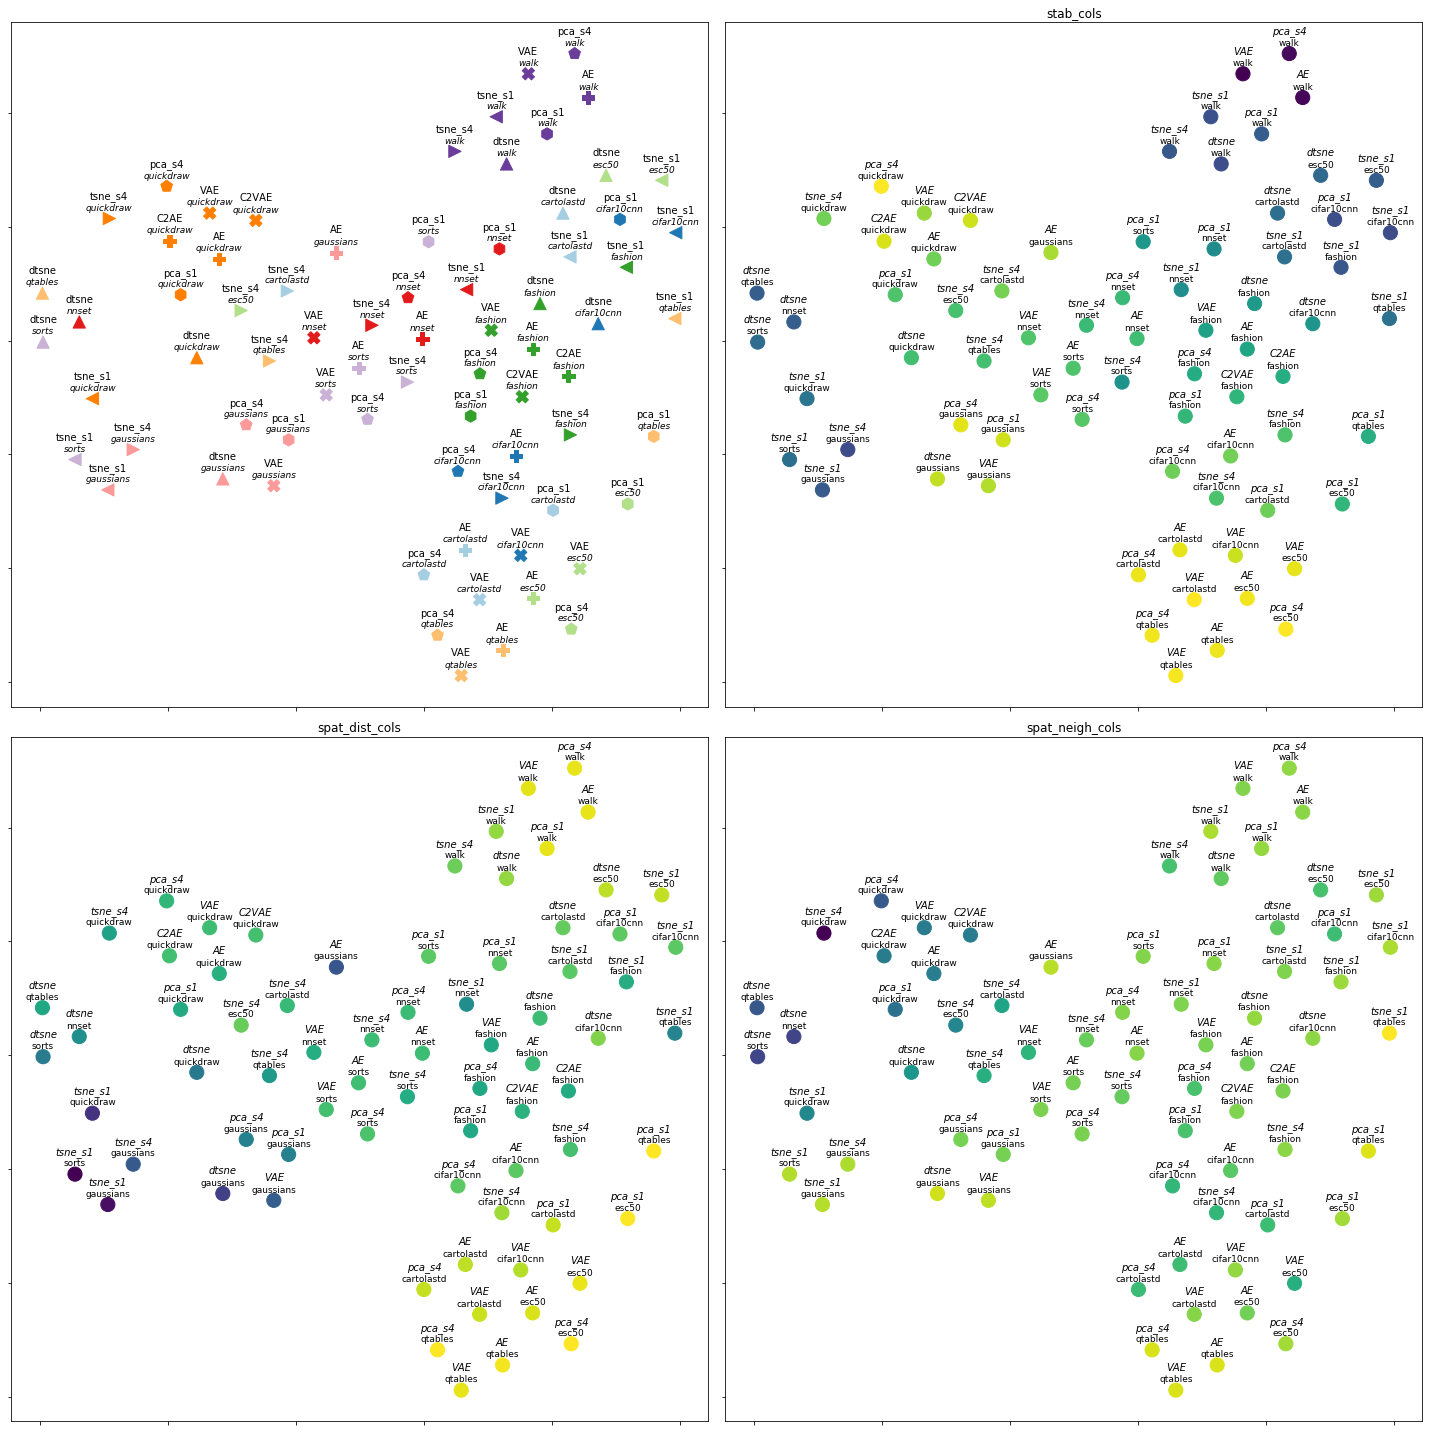

In [26]:
def mscatter(x,y,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,20))


X = df_metrics[metrics]

tsne = manifold.TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(X)

colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
color_dict = dict(zip(sorted(set(df_metrics['dataset'])), colors))
c = [color_dict[x] for x in df_metrics['dataset']]


markers = ['P', 'P', 'X', 'X', '<', '>', '^', 'h', 'p']
techs = ['AE', 'C2AE', 'VAE', 'C2VAE', 'tsne_s1', 'tsne_s4', 'dtsne', 'pca_s1', 'pca_s4']
marker_dict = dict(zip(techs, markers))
m = [marker_dict[x] for x in df_metrics['method']]


# fig, ax = plt.subplots(figsize=(10,10))
ax = axs[0][0]
mscatter(Y[:, 0], Y[:, 1], c=c, s=150, m=m, ax=ax)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

text = list(zip(df_metrics['dataset'], df_metrics['method']))
for c,t in zip(Y, text):
    ax.annotate(t[1], (c[0], c[1] + 3.5), fontsize=10, ha='center')
    ax.annotate(t[0], (c[0], c[1] + 1.5), fontsize=9, style='italic', ha='center')
plt.tight_layout()


df = pd.DataFrame(np.array([df_metrics[spat_dist_cols].mean(axis=1),
                            df_metrics[spat_neigh_cols].mean(axis=1),
                            df_metrics[stab_cols].mean(axis=1)]).T,
                            index=df_metrics['dataset'], columns=['spat_dist_cols', 'spat_neigh_cols', 'stab_cols'])


for i, col in enumerate(['stab_cols', 'spat_dist_cols', 'spat_neigh_cols']):
    X = df_metrics[metrics]

    tsne = manifold.TSNE(n_components=2, random_state=0)
    Y = tsne.fit_transform(X)

    colors = df[col]

    ax = axs.flatten()[i+1]
    ax.scatter(Y[:, 0], Y[:, 1], c=colors, s=200)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.set_title(col)

    text = list(zip(df_metrics['dataset'], df_metrics['method']))
    for c,t in zip(Y, text):
        ax.annotate(t[1], (c[0], c[1] + 3.5), fontsize=10, style='italic', ha='center')
        ax.annotate(t[0], (c[0], c[1] + 1.5), fontsize=9, ha='center')
        
plt.tight_layout()

In [27]:
plt.tight_layout()
fig.savefig('tsne_plot.pdf')

<Figure size 432x288 with 0 Axes>